In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Working with the CSV files to get first accuracy results

In [ ]:
#info
df = pd.read_csv('/content/drive/MyDrive/ump6/Data/infos.csv')
#rendement
df1 = pd.read_csv('/content/drive/MyDrive/ump6/Data/rendement.csv')

In [ ]:
print(len(df),len(df1))

480 480


#### EDA on infos

In [ ]:
df.head(3)

,Annee,ID,Var1,Var2,Var3,Var4,Var5,Var6
0,15/16,ID0,categorie1,categorie0,2.771754,7.188299,4.97,1.77
1,15/16,ID1,categorie1,categorie0,2.771754,7.146000,4.97,1.77
2,15/16,ID2,categorie1,categorie0,2.771754,7.137559,1.77,4.97


In [ ]:
print ("The shape of the infos is (row, column):"+ str(df.shape))

The shape of the infos is (row, column):(480, 8)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Annee   480 non-null    object 
 1   ID      480 non-null    object 
 2   Var1    432 non-null    object 
 3   Var2    438 non-null    object 
 4   Var3    430 non-null    float64
 5   Var4    427 non-null    float64
 6   Var5    433 non-null    float64
 7   Var6    432 non-null    float64
dtypes: float64(4), object(4)
memory usage: 30.1+ KB


In [ ]:
#stats on infos on the numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Var3,430.0,2.528055,0.573398,1.45821,2.099,2.771754,2.771754,4.450250
Var4,427.0,12.090531,4.190951,5.56976,8.595,12.360028,14.595000,19.941633
Var5,433.0,4.933048,0.342272,1.77000,4.970,4.970000,4.970000,4.970000
Var6,432.0,1.812998,0.413170,1.59500,1.770,1.770000,1.770000,4.970000


In [ ]:
#Counts of different types
df.dtypes.value_counts()

object     4
float64    4
dtype: int64

In [ ]:
#checking the missing values
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
missing_percentage(df)

,Total,Percent
Var4,53,11.04
Var3,50,10.42
Var1,48,10.00
Var6,48,10.00
Var5,47,9.79
Var2,42,8.75


In [ ]:
df.columns

Index(['Annee', 'ID', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6'], dtype='object')

Text(0.5, 1.0, 'VAR4 vs VAR3')

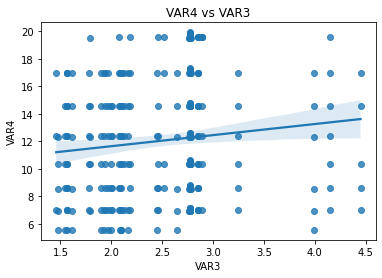

In [ ]:
ax = sns.regplot(data =df,x='Var3', y='Var4')
ax.set_ylabel('VAR4')
ax.set_xlabel('VAR3')
ax.set_title('VAR4 vs VAR3')

In [ ]:
df.corr()

,Var3,Var4,Var5,Var6
Var3,1.000000,0.109386,-0.048583,0.080247
Var4,0.109386,1.000000,-0.048417,0.033188
Var5,-0.048583,-0.048417,1.000000,-0.976339
Var6,0.080247,0.033188,-0.976339,1.000000


The correlation coefficient (ρ) is a measure that determines the degree to which the movement of two different variables is associated.
- A correlation coefficient greater than zero indicates a positive relationship while a value less than zero signifies a negative relationship.
- A value of zero indicates no relationship between the two variables being compared.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


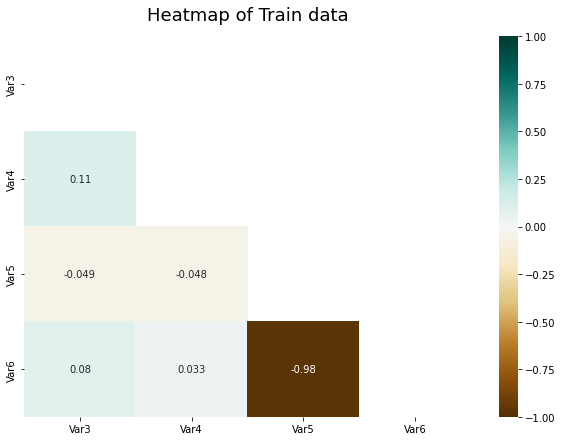

In [ ]:
#heatmap
plt.figure(figsize=(10, 7))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap of Train data', fontdict={'fontsize':18}, pad=16);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Var6 vs Var5')

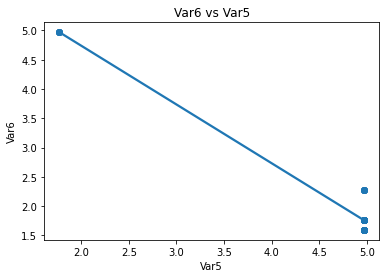

In [ ]:
ax = sns.regplot(df['Var5'],df['Var6'])
ax.set_ylabel('Var6')
ax.set_xlabel('Var5')
ax.set_title('Var6 vs Var5')

##### EDA Rendement

In [ ]:
df1['Output'].describe()
#mean as infinite raises concern and it isn't needed in our model afterwards, drop to continue EDA

count    480.000000
mean            inf
std             NaN
min        2.044418
25%        3.316762
50%        3.592978
75%        3.887547
max             inf
Name: Output, dtype: float64

In [ ]:
df11 = df1.copy(deep=True)
df11 = df11[df11['Output'] !=np.inf]
print(len(df11),df11.head(3))

412   ID_Terre     An    Output
0      ID0  15/16  3.248868
1      ID1  15/16  3.194677
2      ID2  15/16  3.556090


In [ ]:
df11['Output'].describe()

count    412.000000
mean       3.479690
std        0.395812
min        2.044418
25%        3.263843
50%        3.513139
75%        3.750737
max        4.860114
Name: Output, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


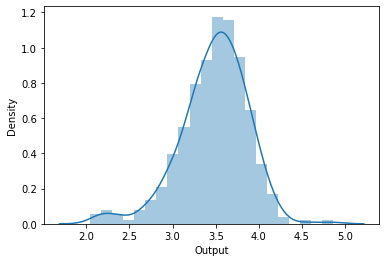

In [ ]:
#histogram
sns.distplot(df11['Output'])

#### merge infos and rendement to see the correlation with the target var 'output'

In [ ]:
print(df.columns,df1.columns)

Index(['Annee', 'ID', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6'], dtype='object') Index(['ID_Terre', 'An', 'Output'], dtype='object')


In [ ]:
df1.rename(columns = {'ID_Terre':'ID', 'An':'Annee'}, inplace = True)

In [ ]:
df1.columns

Index(['ID', 'Annee', 'Output'], dtype='object')

In [ ]:
dff = pd.merge(df, df1,how='inner',on=['ID', 'Annee'])

In [ ]:
dff.head(3)

,Annee,ID,Var1,Var2,Var3,Var4,Var5,Var6,Output
0,15/16,ID0,categorie1,categorie0,2.771754,7.188299,4.97,1.77,3.248868
1,15/16,ID1,categorie1,categorie0,2.771754,7.146000,4.97,1.77,3.194677
2,15/16,ID2,categorie1,categorie0,2.771754,7.137559,1.77,4.97,3.556090


In [ ]:
dff.tail(3)

,Annee,ID,Var1,Var2,Var3,Var4,Var5,Var6,Output
477,21/22,ID70,categorie3,categorie0,1.903610,16.995,4.97,1.77,inf
478,21/22,ID41,categorie0,categorie0,2.895684,19.595,4.97,1.77,inf
479,21/22,ID47,categorie1,categorie0,2.895684,19.595,4.97,1.77,inf


##### EDA The whole Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


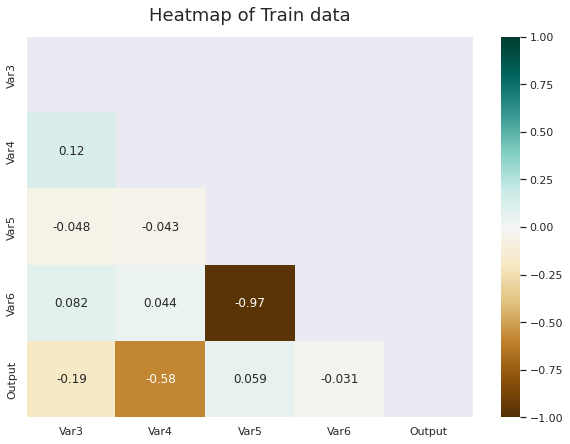

In [ ]:
#heatmap
plt.figure(figsize=(10, 7))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dff.corr(), dtype=np.bool))
heatmap = sns.heatmap(dff.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap of Train data', fontdict={'fontsize':18}, pad=16);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Output vs Var3')

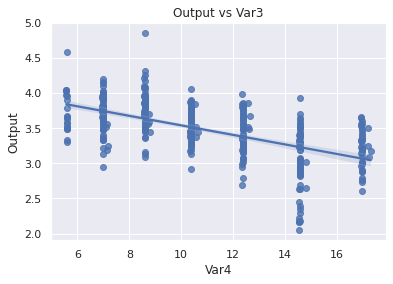

In [ ]:
ax = sns.regplot(dff['Var4'],dff['Output'])
ax.set_ylabel('Output')
ax.set_xlabel('Var4')
ax.set_title('Output vs Var3')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Var6 vs Var5')

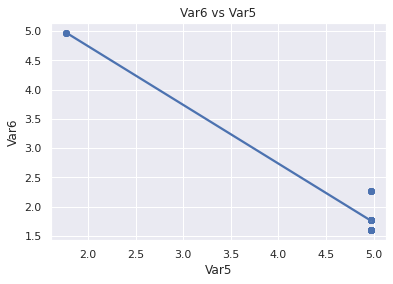

In [ ]:
ax = sns.regplot(dff['Var5'],dff['Var6'])
ax.set_ylabel('Var6')
ax.set_xlabel('Var5')
ax.set_title('Var6 vs Var5')

We clearly see that this relationship is complex and non-linear. Therefore, random forests are extremely useful to model this type of non-linear relationship.


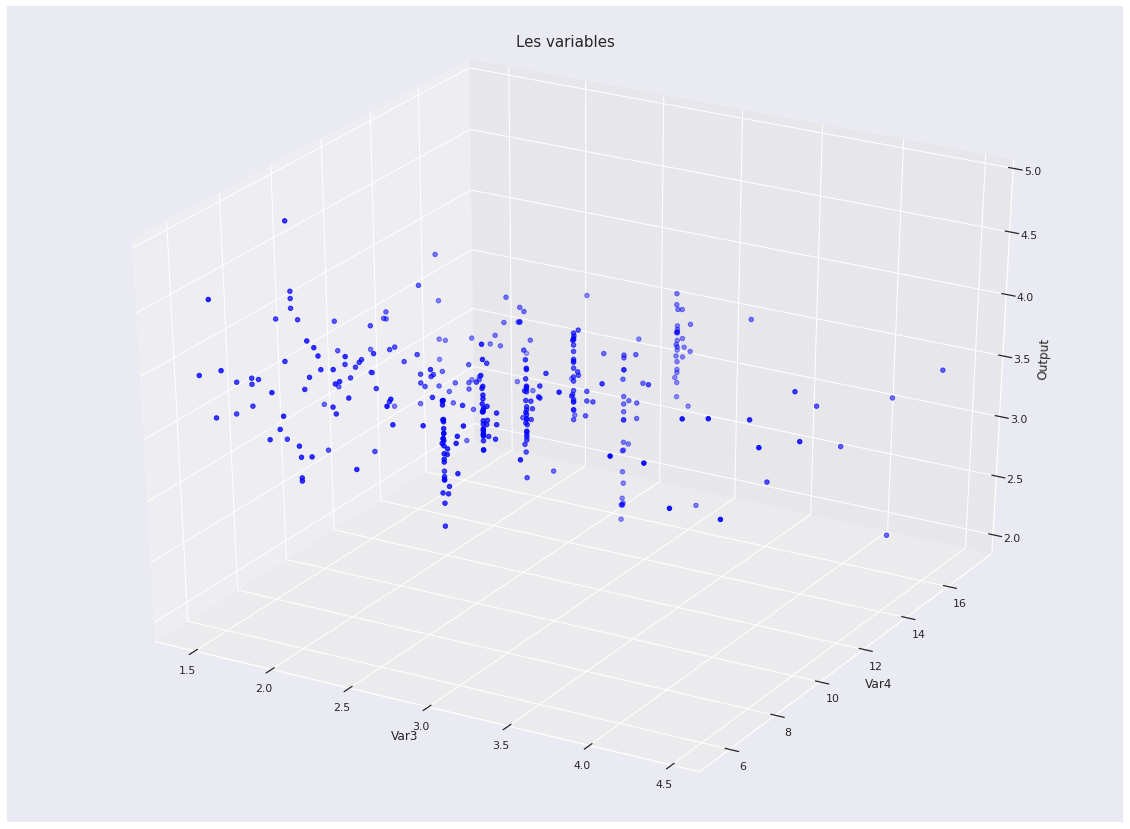

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set(style='darkgrid')

fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')

x=dff['Var3']
y=dff['Var4']
z=dff['Output']

ax.scatter3D(x, y, z, color='blue')
ax.set_title("Les variables", pad=25, size=15)
ax.set_xlabel('Var3') 
ax.set_ylabel('Var4') 
ax.set_zlabel('Output')

#'We clearly see that this relationship is complex and non-linear. Therefore, random forests are extremely useful to model this type of non-linear relationship.

We clearly see that this relationship is complex and non-linear. Therefore, random forests are extremely useful to model this type of non-linear relationship.


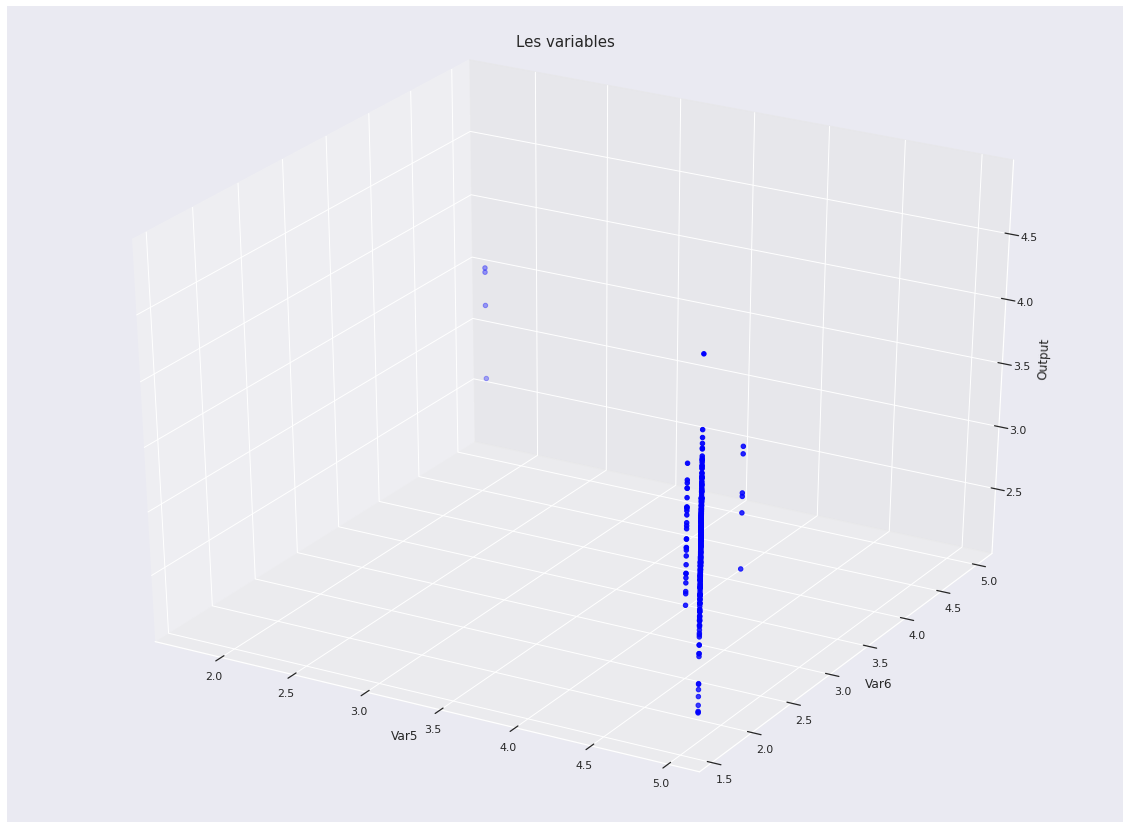

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set(style='darkgrid')

fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')

x=dff['Var5']
y=dff['Var6']
z=dff['Output']

ax.scatter3D(x, y, z, color='blue')
ax.set_title("Les variables", pad=25, size=15)
ax.set_xlabel('Var5') 
ax.set_ylabel('Var6') 
ax.set_zlabel('Output')


In [ ]:
len(dff)

480

### Preparer Test Data

In [ ]:
dff_tst = dff[dff['Output']== np.inf]

In [ ]:
dff = dff[dff['Output'] !=np.inf]

In [ ]:
dff.isna().sum()

Annee      0
ID         0
Var1      43
Var2      38
Var3      45
Var4      45
Var5      40
Var6      44
Output     0
dtype: int64

In [ ]:
len(dff)

412

In [ ]:
#dff_test => for testing
#dff=> for train

#dff_test drop column output
dff_tst.drop('Output', 1)
print(len(dff_tst),dff_tst.head(3))

68      Annee   ID        Var1        Var2      Var3       Var4  Var5  Var6  \
412  21/22  ID0  categorie1  categorie0  2.771754  19.941633  4.97  1.77   
413  21/22  ID1  categorie1  categorie0  2.771754  19.866000  4.97  1.77   
414  21/22  ID2  categorie1  categorie0  2.771754  19.850892  1.77  4.97   

     Output  
412     inf  
413     inf  
414     inf  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


### Cqtegorical values

In [ ]:
#categorical values => preprocessing


#Assign dummy values
dff_11 = pd.get_dummies(dff['Var1']).reset_index(drop=True)
dff_11

,categorie0,categorie1,categorie2,categorie3,categorie4
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
407,0,0,0,1,0
408,0,0,0,1,0
409,0,0,0,1,0
410,0,0,0,1,0


In [ ]:
dff.tail()

,Annee,ID,Var1,Var2,Var3,Var4,Var5,Var6,Output
407,20/21,ID66,categorie3,categorie0,2.01009,14.595,4.97,1.595,3.699682
408,20/21,ID67,categorie3,categorie0,1.99500,14.595,4.97,NaN,3.487509
409,20/21,ID68,categorie3,categorie0,1.97025,14.595,4.97,1.595,3.287237
410,20/21,ID69,categorie3,categorie0,1.93644,14.595,4.97,1.770,3.365749
411,20/21,ID70,NaN,categorie0,1.90361,14.595,4.97,1.770,3.286027


In [ ]:
dff_11.tail()

,categorie0,categorie1,categorie2,categorie3,categorie4
407,0,0,0,1,0
408,0,0,0,1,0
409,0,0,0,1,0
410,0,0,0,1,0
411,0,0,0,0,0


In [ ]:
dff_2 = pd.merge(dff,dff_11,left_index=True,right_index=True)
dff_2

,Annee,ID,Var1,Var2,Var3,Var4,Var5,Var6,Output,categorie0,categorie1,categorie2,categorie3,categorie4
0,15/16,ID0,categorie1,categorie0,2.771754,7.188299,4.97,1.770,3.248868,0,1,0,0,0
1,15/16,ID1,categorie1,categorie0,2.771754,7.146000,4.97,1.770,3.194677,0,1,0,0,0
2,15/16,ID2,categorie1,categorie0,2.771754,7.137559,1.77,4.970,3.556090,0,1,0,0,0
3,15/16,ID3,categorie1,categorie0,2.771754,7.120694,4.97,1.770,3.513139,0,1,0,0,0
4,15/16,ID4,NaN,categorie0,2.771754,6.995000,4.97,1.770,3.351073,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,20/21,ID66,categorie3,categorie0,2.010090,14.595000,4.97,1.595,3.699682,0,0,0,1,0
408,20/21,ID67,categorie3,categorie0,1.995000,14.595000,4.97,NaN,3.487509,0,0,0,1,0
409,20/21,ID68,categorie3,categorie0,1.970250,14.595000,4.97,1.595,3.287237,0,0,0,1,0
410,20/21,ID69,categorie3,categorie0,1.936440,14.595000,4.97,1.770,3.365749,0,0,0,1,0


In [ ]:
#Assign dummy values
dff_12 = pd.get_dummies(dff['Var2']).reset_index(drop=True)
dff_12


,categorie0
0,1
1,1
2,1
3,1
4,1
...,...
407,1
408,1
409,1
410,1


In [ ]:
dff_22 = pd.merge(dff_2,dff_12,left_index=True,right_index=True)
dff_22

,Annee,ID,Var1,Var2,Var3,Var4,Var5,Var6,Output,categorie0_x,categorie1,categorie2,categorie3,categorie4,categorie0_y
0,15/16,ID0,categorie1,categorie0,2.771754,7.188299,4.97,1.770,3.248868,0,1,0,0,0,1
1,15/16,ID1,categorie1,categorie0,2.771754,7.146000,4.97,1.770,3.194677,0,1,0,0,0,1
2,15/16,ID2,categorie1,categorie0,2.771754,7.137559,1.77,4.970,3.556090,0,1,0,0,0,1
3,15/16,ID3,categorie1,categorie0,2.771754,7.120694,4.97,1.770,3.513139,0,1,0,0,0,1
4,15/16,ID4,NaN,categorie0,2.771754,6.995000,4.97,1.770,3.351073,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,20/21,ID66,categorie3,categorie0,2.010090,14.595000,4.97,1.595,3.699682,0,0,0,1,0,1
408,20/21,ID67,categorie3,categorie0,1.995000,14.595000,4.97,NaN,3.487509,0,0,0,1,0,1
409,20/21,ID68,categorie3,categorie0,1.970250,14.595000,4.97,1.595,3.287237,0,0,0,1,0,1
410,20/21,ID69,categorie3,categorie0,1.936440,14.595000,4.97,1.770,3.365749,0,0,0,1,0,1


In [ ]:
dff_22.dropna(inplace=True)

In [ ]:
#split the data 
X= dff_22.drop(['Annee','ID','Var1','Var2'],axis=1)

In [ ]:
X['y']= X['Output']
X = X.drop(['Output'],axis=1)
X

,Var3,Var4,Var5,Var6,categorie0_x,categorie1,categorie2,categorie3,categorie4,categorie0_y,y
0,2.771754,7.188299,4.97,1.770,0,1,0,0,0,1,3.248868
1,2.771754,7.146000,4.97,1.770,0,1,0,0,0,1,3.194677
2,2.771754,7.137559,1.77,4.970,0,1,0,0,0,1,3.556090
3,2.771754,7.120694,4.97,1.770,0,1,0,0,0,1,3.513139
5,2.894434,6.995000,4.97,1.770,0,1,0,0,0,1,3.788778
...,...,...,...,...,...,...,...,...,...,...,...
403,2.099000,14.595000,4.97,1.770,0,0,0,1,0,1,3.515717
405,2.099000,14.595000,4.97,1.770,0,0,0,1,0,1,3.639142
407,2.010090,14.595000,4.97,1.595,0,0,0,1,0,1,3.699682
409,1.970250,14.595000,4.97,1.595,0,0,0,1,0,1,3.287237


In [ ]:
y = dff_22['Output']
y

0      3.248868
1      3.194677
2      3.556090
3      3.513139
5      3.788778
         ...   
403    3.515717
405    3.639142
407    3.699682
409    3.287237
410    3.365749
Name: Output, Length: 220, dtype: float64

##### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X1 = sc_X.fit_transform(X)


#### Train/split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1.drop(['y'],axis=1), y,test_size = .33, random_state=0)

#### Models

In [ ]:
#RD 
# import Random Forest classifier

from sklearn.ensemble import RandomForestRegressor



# instantiate the classifier 

rfc = RandomForestRegressor(n_estimators=2,max_depth = 7)



# fit the model

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 2 decision-trees : {0:0.4f}'. format(rfc.score(X_test, y_test)))

Model accuracy score with 10 decision-trees : 0.9852


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.0023554830137835015

In [ ]:
from numpy.ma.core import maximum_fill_value
from sklearn.svm import LinearSVR

from sklearn.svm import SVR
SVM = SVR(kernel='rbf',max_iter=20000,epsilon=0.01)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
score = SVM.score(X_test, y_test)
print('SVM:', score)
mse1 = mean_squared_error(y_test, y_pred)



L_SVM = LinearSVR(max_iter = 2000000)
L_SVM.fit(X_train, y_train)
y_pred = L_SVM.predict(X_test)
score = L_SVM.score(X_test, y_test)
print('Linear SVM:', score)
mse2 = mean_squared_error(y_test, y_pred)
print(mse1,mse2)

SVM: 0.8849479234037337
Linear SVM: 0.9999999280473806
0.01827060843693778 1.1426287769935924e-08


In [ ]:
### Decision Tree
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print('DT:', score)
mse3 = mean_squared_error(y_test, y_pred)
mse3

DT: 0.9648759351922493


0.0055778048845479405

In [ ]:
X.columns

Index(['Var3', 'Var4', 'Var5', 'Var6', 'categorie0_x', 'categorie1',
       'categorie2', 'categorie3', 'categorie4', 'categorie0_y', 'y'],
      dtype='object')

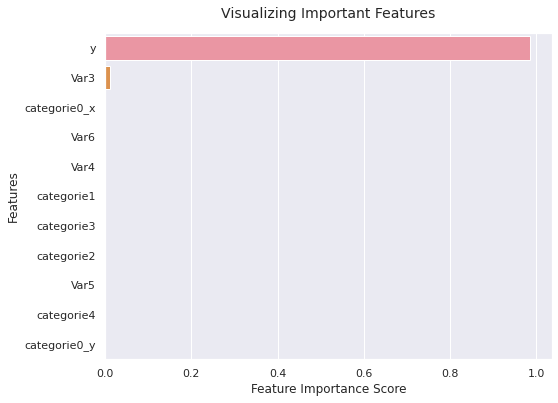

In [ ]:
#fig = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(rfc.feature_importances_, 
                        index=['Var3', 'Var4', 'Var5', 'Var6', 'categorie0_x', 'categorie1',  'categorie2', 'categorie3', 'categorie4', 'categorie0_y','y']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')